<a href="https://colab.research.google.com/github/Neyder2502/salud-mental-analisis-datos/blob/main/notebooks/Julio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LIBRERIAS

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, linregress
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## ARCHIVO CSV

In [32]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Archivo cargado correctamente")

Saving Mental_Health_and_Social_Media_Balance_Dataset.csv to Mental_Health_and_Social_Media_Balance_Dataset (2).csv
Archivo cargado correctamente


## ESTRUCTURA Y CALIDAD DE DATOS

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.isna().sum()

## DETECCION DE VALORES ATIPICOS  (REVISAR Y ENTENDER)



In [ ]:
df.boxplot(column=['Daily_Screen_Time(hrs)'])
plt.title('Outliers - Horas de pantalla')
plt.show()

df.boxplot(column=['Sleep_Quality(1-10)'])
plt.title('Outliers - Calidad de sueño')
plt.show()

df.boxplot(column=['Stress_Level(1-10)'])
plt.title('Outliers - Estrés')
plt.show()

df.boxplot(column=['Happiness_Index(1-10)'])
plt.title('Outliers - Felicidad')
plt.show()

In [ ]:
print("Edades fuera de rango:")
display(df[(df['Age'] < 10) | (df['Age'] > 80)])

print("\nHoras de pantalla fuera de rango:")
display(df[(df['Daily_Screen_Time(hrs)'] < 0) | (df['Daily_Screen_Time(hrs)'] > 24)])

print("\nCalidad de sueño fuera de 1-10:")
display(df[(df['Sleep_Quality(1-10)'] < 1) | (df['Sleep_Quality(1-10)'] > 10)])

print("\nEstrés fuera de 1-10:")
display(df[(df['Stress_Level(1-10)'] < 1) | (df['Stress_Level(1-10)'] > 10)])

print("\nFelicidad fuera de 1-10:")
display(df[(df['Happiness_Index(1-10)'] < 1) | (df['Happiness_Index(1-10)'] > 10)])

print("\nDías sin redes fuera de rango:")
display(df[(df['Days_Without_Social_Media'] < 0) | (df['Days_Without_Social_Media'] > 30)])

## ESTADISTICAS Y DISTRIBUICION DE VARIABLES (revisar)

### estadistica (buscar que singifica la desviacion estandar)

In [ ]:
df.describe().round(3)

### distribucion

In [ ]:
df['Age'].value_counts()

In [ ]:
df['Gender'].value_counts()

In [ ]:
df['Daily_Screen_Time(hrs)'].value_counts()

In [ ]:
df['Sleep_Quality(1-10)'].value_counts()

In [ ]:
df['Stress_Level(1-10)'].value_counts()

In [ ]:
df['Days_Without_Social_Media'].value_counts()

In [ ]:
df['Exercise_Frequency(week)'].value_counts()

In [ ]:
df['Social_Media_Platform'].value_counts()

In [ ]:
df['Happiness_Index(1-10)'].value_counts()

#BIENESTAR FISICO Y EMOCIONAL

##CALIDAD DEL SUEÑO VS ESTRES

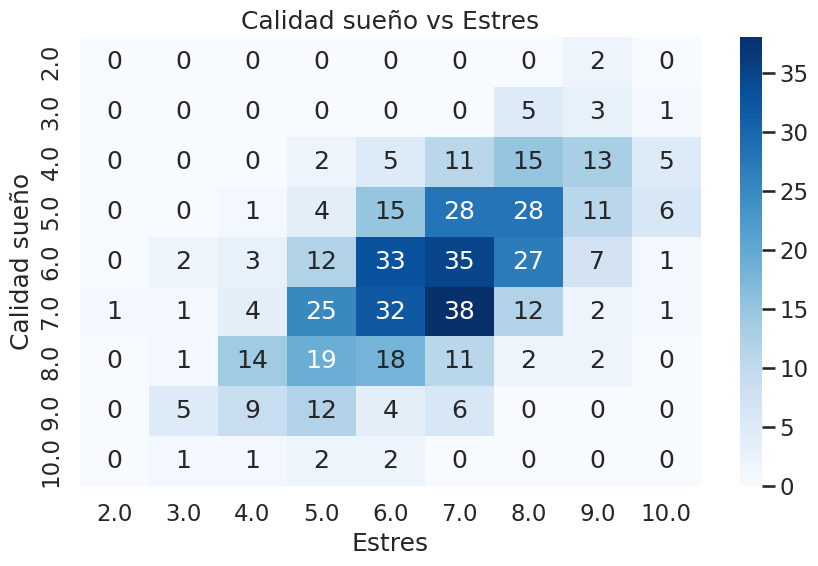

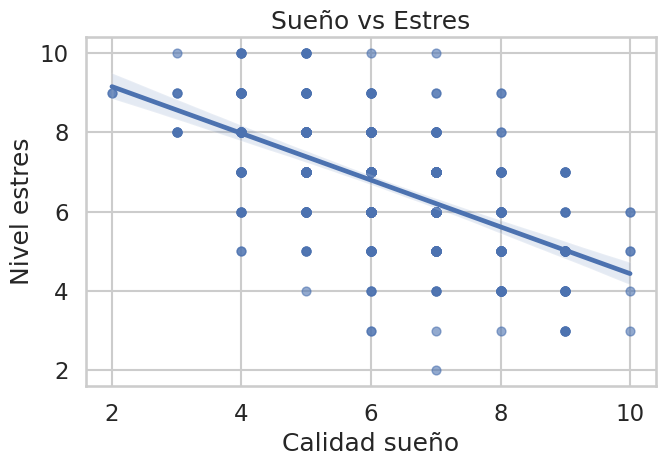


Correlacion Sueño - Estres
Pearson: -0.585
p-valor: 3.199e-47

Tabla frecuencias:


Stress_Level(1-10),2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Sleep_Quality(1-10),,,,,,,,,
2.0,0,0,0,0,0,0,0,2,0
3.0,0,0,0,0,0,0,5,3,1
4.0,0,0,0,2,5,11,15,13,5
5.0,0,0,1,4,15,28,28,11,6
6.0,0,2,3,12,33,35,27,7,1
7.0,1,1,4,25,32,38,12,2,1
8.0,0,1,14,19,18,11,2,2,0
9.0,0,5,9,12,4,6,0,0,0
10.0,0,1,1,2,2,0,0,0,0


In [24]:
# relacion sueño y estres
tabla_sueno_estres = df.groupby(["Sleep_Quality(1-10)", "Stress_Level(1-10)"]).size().unstack(fill_value=0)
plt.figure(figsize=(9,6))
sns.heatmap(tabla_sueno_estres, annot=True, fmt="d", cmap="Blues")
plt.title("Calidad sueño vs Estres")
plt.xlabel("Estres")
plt.ylabel("Calidad sueño")
plt.tight_layout()
plt.savefig("imgs/sleep_vs_stress_heatmap.png", dpi=300)
plt.show()

# scatter con linea de regresion
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Sleep_Quality(1-10)", y="Stress_Level(1-10)",
            scatter_kws={"alpha":0.6, "s":40})
plt.title("Sueño vs Estres")
plt.xlabel("Calidad sueño")
plt.ylabel("Nivel estres")
plt.tight_layout()
plt.savefig("imgs/sleep_vs_stress_scatter.png", dpi=300)
plt.show()

# correlacion de pearson
valid = df[["Sleep_Quality(1-10)","Stress_Level(1-10)"]].dropna()
corr, p = pearsonr(valid.iloc[:,0], valid.iloc[:,1])
print("\nCorrelacion Sueño - Estres")
print(f"Pearson: {corr:.3f}")
print(f"p-valor: {p:.4g}")
print("\nTabla frecuencias:")
display(tabla_sueno_estres)

##CALIDAD DEL SUEÑO VS FELICIDAD

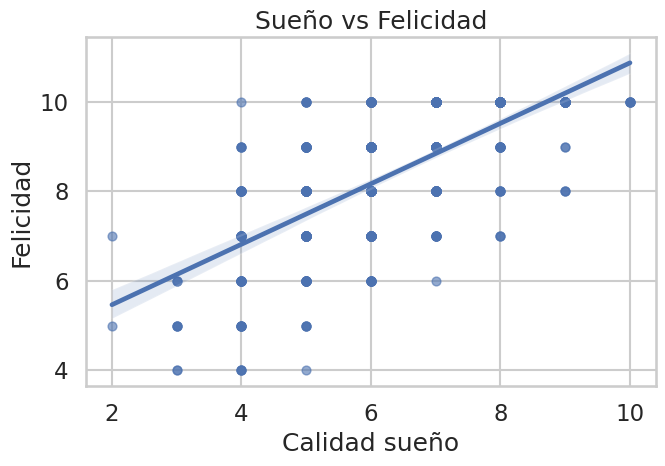

,Sleep_Quality(1-10),Happiness_Index(1-10)
count,500.000,500.000
mean,6.304,8.376
std,1.530,1.524
min,2.000,4.000
25%,5.000,7.000
50%,6.000,9.000
75%,7.000,10.000
max,10.000,10.000



Correlacion Sueño - Felicidad
Pearson: 0.679
p-valor: 8.398e-69


In [25]:
# relacion sueño y felicidad
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Sleep_Quality(1-10)", y="Happiness_Index(1-10)",
            scatter_kws={"alpha":0.6, "s":40})
plt.title("Sueño vs Felicidad")
plt.xlabel("Calidad sueño")
plt.ylabel("Felicidad")
plt.tight_layout()
plt.savefig("imgs/sleep_vs_happiness_reg.png", dpi=300)
plt.show()

# estadisticas basicas
display(df[["Sleep_Quality(1-10)", "Happiness_Index(1-10)"]].describe().round(3))

# correlacion
valid2 = df[["Sleep_Quality(1-10)","Happiness_Index(1-10)"]].dropna()
corr2, p2 = pearsonr(valid2.iloc[:,0], valid2.iloc[:,1])
print("\nCorrelacion Sueño - Felicidad")
print(f"Pearson: {corr2:.3f}")
print(f"p-valor: {p2:.4g}")

##EJERCICIO VS ESTRES

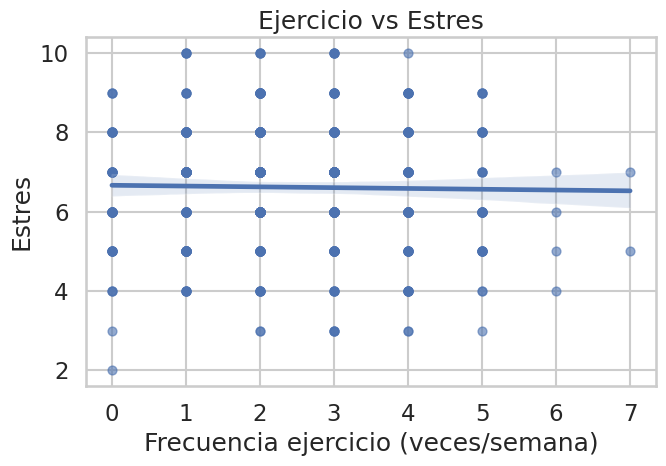

/tmp/ipython-input-143979526.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estres_ejercicio = df.groupby("Cat_Exercise")["Stress_Level(1-10)"].mean()


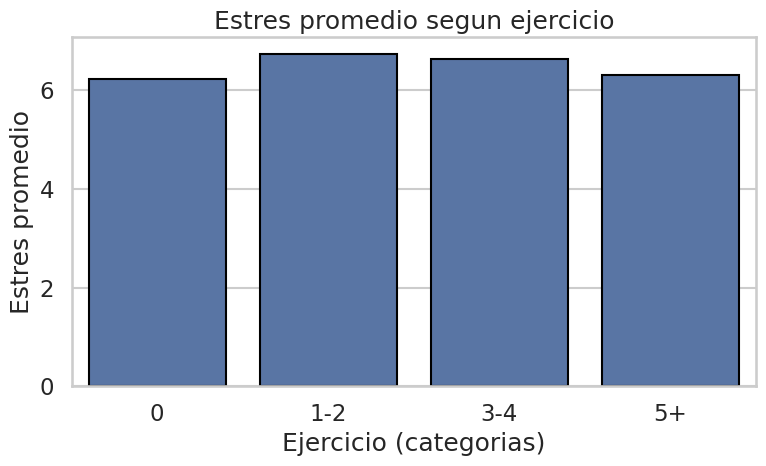

,mean,std,count
Exercise_Frequency(week),,,
0.0,6.23,1.59,43
1.0,6.65,1.51,91
2.0,6.80,1.49,132
3.0,6.70,1.55,117
4.0,6.52,1.62,75
5.0,6.42,1.57,36
6.0,5.50,1.29,4
7.0,6.00,1.41,2



Correlacion Ejercicio - Estres
Pearson: -0.019
p-valor: 0.6785


In [27]:
# ejercicio vs estres
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Exercise_Frequency(week)", y="Stress_Level(1-10)",
            scatter_kws={"alpha":0.6, "s":40})
plt.title("Ejercicio vs Estres")
plt.xlabel("Frecuencia ejercicio (veces/semana)")
plt.ylabel("Estres")
plt.tight_layout()
plt.savefig("imgs/exercise_vs_stress_scatter.png", dpi=300)
plt.show()

# categorias de ejercicio
bins_ex = [-1, 0, 2, 4, 10]
labels_ex = ["0", "1-2", "3-4", "5+"]
df["Cat_Exercise"] = pd.cut(df["Exercise_Frequency(week)"], bins=bins_ex, labels=labels_ex)

# grafico de barras
estres_ejercicio = df.groupby("Cat_Exercise")["Stress_Level(1-10)"].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=estres_ejercicio.index, y=estres_ejercicio.values, edgecolor="black")
plt.title("Estres promedio segun ejercicio")
plt.xlabel("Ejercicio (categorias)")
plt.ylabel("Estres promedio")
plt.tight_layout()
plt.savefig("imgs/exercise_vs_stress_bar.png", dpi=300)
plt.show()

# tabla resumen
display(df.groupby("Exercise_Frequency(week)")["Stress_Level(1-10)"].agg(["mean","std","count"]).round(2))

# correlacion
valid3 = df[["Exercise_Frequency(week)","Stress_Level(1-10)"]].dropna()
corr3, p3 = pearsonr(valid3.iloc[:,0], valid3.iloc[:,1])
print("\nCorrelacion Ejercicio - Estres")
print(f"Pearson: {corr3:.3f}")
print(f"p-valor: {p3:.4g}")

##EJERCICIO VS FELICIDAD

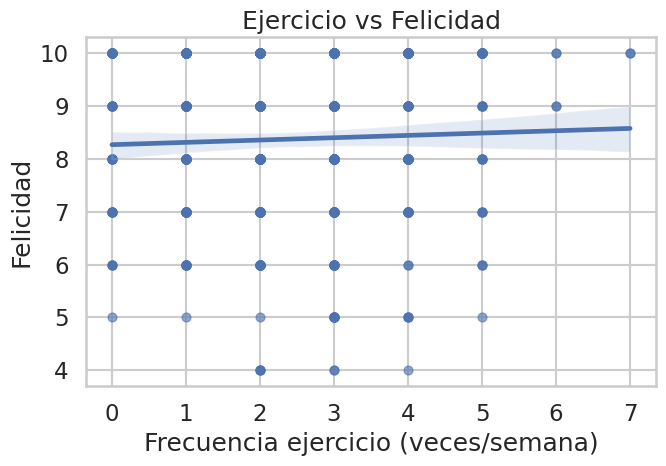

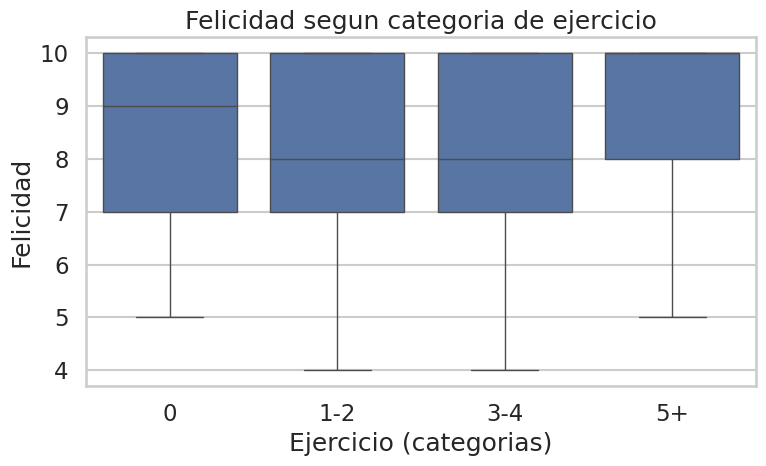

,mean,std,count
Exercise_Frequency(week),,,
0.0,8.53,1.50,43
1.0,8.43,1.39,91
2.0,8.25,1.51,132
3.0,8.21,1.64,117
4.0,8.41,1.54,75
5.0,8.78,1.51,36
6.0,9.50,0.58,4
7.0,10.00,0.00,2



Correlacion Ejercicio - Felicidad
Pearson: 0.041
p-valor: 0.3576


In [29]:
# ejercicio vs felicidad
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Exercise_Frequency(week)", y="Happiness_Index(1-10)",
            scatter_kws={"alpha":0.6, "s":40})
plt.title("Ejercicio vs Felicidad")
plt.xlabel("Frecuencia ejercicio (veces/semana)")
plt.ylabel("Felicidad")
plt.tight_layout()
plt.savefig("imgs/exercise_vs_happiness_scatter.png", dpi=300)
plt.show()

# boxplot por categoria
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Cat_Exercise", y="Happiness_Index(1-10)")
plt.title("Felicidad segun categoria de ejercicio")
plt.xlabel("Ejercicio (categorias)")
plt.ylabel("Felicidad")
plt.tight_layout()
plt.savefig("imgs/exercise_vs_happiness_box.png", dpi=300)
plt.show()

# tabla resumen
display(df.groupby("Exercise_Frequency(week)")["Happiness_Index(1-10)"].agg(["mean","std","count"]).round(2))

# correlacion
valid4 = df[["Exercise_Frequency(week)","Happiness_Index(1-10)"]].dropna()
corr4, p4 = pearsonr(valid4.iloc[:,0], valid4.iloc[:,1])
print("\nCorrelacion Ejercicio - Felicidad")
print(f"Pearson: {corr4:.3f}")
print(f"p-valor: {p4:.4g}")

##CLUSTER DE USUARIOS

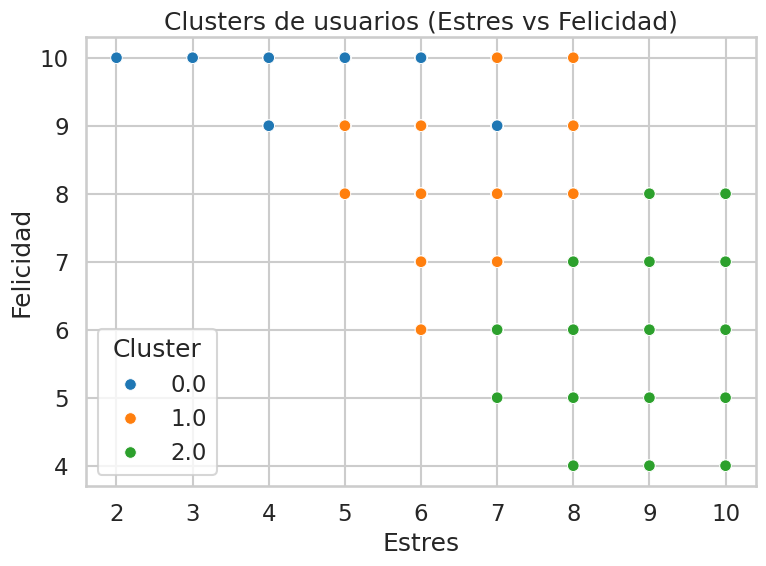


Promedios por cluster:


,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Exercise_Frequency(week),Happiness_Index(1-10)
Cluster,,,,,
0.0,3.85,7.73,5.22,2.58,9.76
1.0,5.91,5.98,6.89,2.38,8.23
2.0,7.66,4.51,8.47,2.35,6.30



Conteo de usuarios por cluster:


,count
Cluster,
0.0,180
1.0,216
2.0,104


In [33]:
# clustering de usuarios
features = [
    "Daily_Screen_Time(hrs)",
    "Sleep_Quality(1-10)",
    "Stress_Level(1-10)",
    "Exercise_Frequency(week)",
    "Happiness_Index(1-10)"
]
X = df[features].dropna()
idx = X.index

# escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# kmeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df.loc[idx, "Cluster"] = labels

# scatter por clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.loc[idx], x="Stress_Level(1-10)", y="Happiness_Index(1-10)",
                hue="Cluster", palette="tab10", s=70)
plt.title("Clusters de usuarios (Estres vs Felicidad)")
plt.xlabel("Estres")
plt.ylabel("Felicidad")
plt.tight_layout()
plt.savefig("imgs/clusters_scatter.png", dpi=300)
plt.show()

# resultados
print("\nPromedios por cluster:")
display(df.groupby("Cluster")[features].mean().round(2))
print("\nConteo de usuarios por cluster:")
display(df["Cluster"].value_counts().sort_index())